# Project 9:  A Demographic and Regional Analysis of Depressive Symptoms During COVID-19

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df = pd.read_csv('Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days.csv')
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


In [133]:
df.tail()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
14368,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,3.10,62,"Sep 20 - Oct 2, 2023",09/20/2023,10/02/2023,33.2,29.8,36.7,29.8 - 36.7,30.7-33.5
14369,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,3.10,62,"Sep 20 - Oct 2, 2023",09/20/2023,10/02/2023,34.3,31.0,37.7,31.0 - 37.7,33.6-36.2
14370,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,3.10,62,"Sep 20 - Oct 2, 2023",09/20/2023,10/02/2023,44.7,40.0,49.4,40.0 - 49.4,36.3-44.7
14371,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,3.10,62,"Sep 20 - Oct 2, 2023",09/20/2023,10/02/2023,30.4,27.1,33.9,27.1 - 33.9,24.5-30.6
14372,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wyoming,Wyoming,3.10,62,"Sep 20 - Oct 2, 2023",09/20/2023,10/02/2023,36.3,30.1,42.9,30.1 - 42.9,36.3-44.7


# Data Exploration & Wrangling:
Exploring the data to understand its structure and features, and cleaning up the dataset.

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14373 entries, 0 to 14372
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               14373 non-null  object 
 1   Group                   14373 non-null  object 
 2   State                   14373 non-null  object 
 3   Subgroup                14373 non-null  object 
 4   Phase                   14373 non-null  object 
 5   Time Period             14373 non-null  int64  
 6   Time Period Label       14373 non-null  object 
 7   Time Period Start Date  14373 non-null  object 
 8   Time Period End Date    14373 non-null  object 
 9   Value                   13752 non-null  float64
 10  Low CI                  13752 non-null  float64
 11  High CI                 13752 non-null  float64
 12  Confidence Interval     13752 non-null  object 
 13  Quartile Range          9486 non-null   object 
dtypes: float64(3), int64(1), object(10)
me

In [135]:
#Missing values?
df.isnull().sum() #checks for missing


Indicator                    0
Group                        0
State                        0
Subgroup                     0
Phase                        0
Time Period                  0
Time Period Label            0
Time Period Start Date       0
Time Period End Date         0
Value                      621
Low CI                     621
High CI                    621
Confidence Interval        621
Quartile Range            4887
dtype: int64

In [136]:
#Drop missing values
#df = df.dropna()
#df.isnull().sum()

In [137]:
# Descriptive statistics
df.describe()

,Time Period,Value,Low CI,High CI
count,14373.00000,13752.000000,13752.000000,13752.000000
mean,30.97871,29.604632,25.994554,33.458661
std,18.61803,8.252621,8.019409,8.684505
min,1.00000,6.400000,4.500000,7.900000
25%,15.00000,24.075000,20.600000,27.700000
50%,32.00000,28.900000,25.300000,32.900000
75%,47.00000,34.200000,30.400000,38.200000
max,62.00000,85.200000,79.900000,89.500000


In [138]:
#Easily view Categories, subcategories, and states
print("Categories:", df['Group'].unique())
print(" Subcategories:", df['Subgroup'].unique())
print("States:", df['State'].unique())
#print(df['Group'].unique())
#print(df['State'].unique())
#print(df['Subgroup'].unique())
#df['Time Period Label'].unique()

df.head()

Categories: ['National Estimate' 'By Age' 'By Sex' 'By Race/Hispanic ethnicity'
 'By Education' 'By State' 'By Disability status' 'By Gender identity'
 'By Sexual orientation']
 Subcategories: ['United States' '18 - 29 years' '30 - 39 years' '40 - 49 years'
 '50 - 59 years' '60 - 69 years' '70 - 79 years' '80 years and above'
 'Male' 'Female' 'Hispanic or Latino' 'Non-Hispanic White, single race'
 'Non-Hispanic Black, single race' 'Non-Hispanic Asian, single race'
 'Non-Hispanic, other races and multiple races'
 'Less than a high school diploma' 'High school diploma or GED'
 "Some college/Associate's degree" "Bachelor's degree or higher" 'Alabama'
 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut'
 'Delaware' 'District of Columbia' 'Florida' 'Georgia' 'Hawaii' 'Idaho'
 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine'
 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


# Analysis Questions:
1. What are the variations in reported symptoms of depressive disorder at the state level, and are there states that consistently show higher or lower prevalence?
2. How do the reported frequencies of symptoms of depressive disorder vary across different age groups, and are there any significant patterns or differences?

In [139]:
df_agg = df.groupby('State')['Value'].mean().reset_index().sort_values(by = 'Value', ascending= False) #df in descending order to make easier observations

I will beign to answer question 1 by creating a df with states and their average values, in order to create an easy to read graph. 

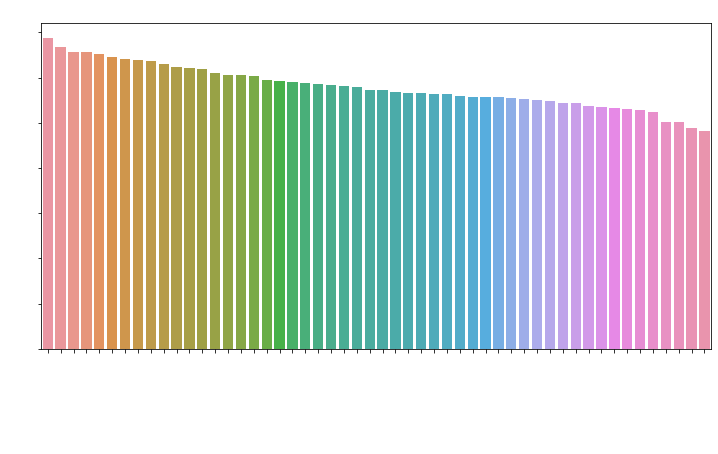

In [140]:
#Barplot for Question #1
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='State', y='Value', data=df_agg)
plt.title('Average Prevalence of Depressive Symptoms by State', color='white') 
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color = 'white')
ax.xaxis.label.set_color('white')        #changing color
ax.yaxis.label.set_color('white')
plt.show()

In [141]:
df_agg.describe()

,Value
count,52.000000
mean,28.993242
std,2.378861
min,24.116667
25%,27.504032
50%,28.606720
75%,30.618414
max,34.365054


In [142]:
print(df_agg.head())
print(df_agg.tail())


            State      Value
18      Louisiana  34.365054
24    Mississippi  33.358065
28         Nevada  32.866667
36       Oklahoma  32.794086
49  West Virginia  32.626882
           State      Value
27      Nebraska  26.195161
50     Wisconsin  25.113978
34  North Dakota  25.081183
23     Minnesota  24.468280
41  South Dakota  24.116667


The analysis of this data of the average prevalence of depressive symptoms across states reveals considerable variation in the impact of depressive disorders at the state level. The dataset, encompassing 51 states/territories, indicates an overall mean prevalence of approximately 28.95, with a moderate standard deviation of 2.38, suggesting variability among states. Examining specific states further, Louisiana emerges with the highest average prevalence at 34.37, accompanied by Mississippi, Nevada, Oklahoma, and West Virginia, all showing higher-than-average rates. Conversely, states such as Nebraska, Wisconsin, North Dakota, Minnesota, and South Dakota demonstrate lower-than-average prevalence, with South Dakota recording the lowest at 24.12. The interquartile range, covering the 25th to 75th percentiles, signifies a central tendency in prevalence. These findings highlight the need for a deeper investigation into contributing factors, particularly in outlier states like Louisiana, to better understand the regional disparities in reported symptoms of depressive disorders.

In [143]:
#Wrangling data to answer question 2
df_age = df[df['Group'] == 'By Age'] # Filter the DataFrame for 'By Age' category
df_age_agg = df_age[['Subgroup', 'Value']] # Neccessary Columns for analysis
#df_age_agg.head()


In [144]:
#Group and sort to get an average for each age range
df_age_agg = df_age.groupby('Subgroup')['Value'].mean().reset_index()
df_age_agg = df_age_agg.sort_values(by='Value', ascending=False) #for easier visualization
df_age_agg

,Subgroup,Value
0,18 - 29 years,42.923656
1,30 - 39 years,35.103763
2,40 - 49 years,31.411290
3,50 - 59 years,28.347312
4,60 - 69 years,22.020430
5,70 - 79 years,16.267742
6,80 years and above,15.280645


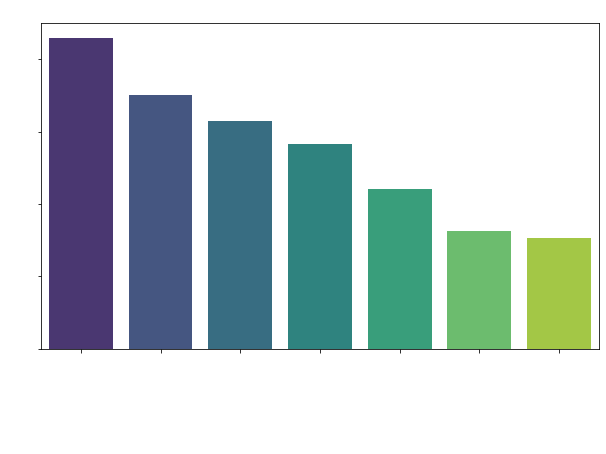

In [145]:
#Graph of mean prevalences
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='Subgroup', y='Value', data=df_age_agg, palette='viridis')
plt.title('Mean Prevalence of Depressive Symptoms by Age Range', color ='white')
plt.xlabel('Age Range')
plt.ylabel('Mean Prevalence')
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color = 'white')
ax1.xaxis.label.set_color('white')        #changing color
ax1.yaxis.label.set_color('white')
plt.show()

Examining the aggregated age data, focusing on reported frequencies of depressive symptoms across various age groups, some patterns emerge. The analysis reveals a distinct gradient in mean prevalence, suggesting a correlation between age and the likelihood of reporting depressive symptoms. Notably, the age group '18 - 29 years' exhibits the highest mean prevalence at approximately 42.92, gradually decreasing as age advances. The group '30 - 39 years' follows with an average prevalence of around 35.10, and this decreasing trend continues through the older age categories, reaching the lowest mean prevalence of approximately 15.28 in the '80 years and above' group. The bar plot visually represents these findings While the observed patterns suggest age-related variations, further exploration or statistical analysis may be warranted to establish the significance of these differences and consider additional factors that could influence the reported prevalence of depressive symptoms in different age brackets. I find the large prevalence of these symptoms in the '18 - 29 years' range to  be suprising as it indicates a heightened vulnerability to depressive symptoms among younger demographics.

# Presentation
The analysis focuses on exploring and understanding the reported symptoms of depressive disorders based on demographic factors and geographic regions. The dataset used is from the NCHS, titled "Indicators of Anxiety or Depression Based on Reported Frequency of Symptoms During Last 7 Days" and has information such as the type of indicator, demographic subgroups like age, state, time period, and the reported prevalence of symptoms.

One of the important visualization techniques applied is the bar plot. I used it to depict the average prevalence of depressive symptoms across different states and age groups. This method created a clear and concise representation of variations, making the identification of patterns and trends easier.

One intriguing insight is there was pretty substantial variation in reported symptoms of depressive disorders across different states. Intrestingly, Louisiana emerged with the highest average prevalence, which raises questions about what is contributing to such variations.

Another finding was the age-related gradient in depressive symptoms, with the '18 - 29 years' age group exhibiting the highest mean prevalence. Which is interesting to consider. 

Given more time, I would have done a temporal analysis to see how the prevalence of these conditions have been changing with respect to time. 

# Sources
https://catalog.data.gov/dataset/indicators-of-anxiety-or-depression-based-on-reported-frequency-of-symptoms-during-last-7-
